In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
import seaborn as sns
from spellchecker import SpellChecker
from nltk.tokenize import sent_tokenize, word_tokenize
pd.options.mode.chained_assignment=None
nltk.download('punkt')

#Reading the csv file
df=pd.read_csv('D:/Sentiment Analysis/Emotions_training.csv')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\divit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Data Preprocessing:**

**Data Preprocessing** is the process of detecting and correting the corrupt or inaccurate records from the dataset.

In [2]:
#Abbreviations for Chat Conversations
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [3]:
#Converting emojis to words
import emoji

def convert_emojis(text):
    return emoji.demojize(text)
df['text']=df['text'].apply(convert_emojis)

#Converting emoticons to the text
import emot
def convert_emoticons(text):
    for emoticon in emot.emo_unicode.EMOTICONS_EMO:
        text= text.replace(emoticon, emot.emo_unicode.EMOTICONS_EMO[emoticon])
    return text
df['text']=df['text'].apply(convert_emoticons)

#Lower Casing
df['text']=df['text'].str.lower()

#Remove Links
def remove_urls(links):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', links)
df['text']=df['text'].apply(remove_urls)

#Remove HTML Tags(if any)
def html_tags(tags):
    tag_pattern = re.compile(r'<.*?>')
    return tag_pattern.sub(r'', tags)
df['text']=df['text'].apply(html_tags)

#Remove next lines
df['text']=df['text'].replace('\n',' ',regex=True)

#Chat Words Conversion
def chat_conversion(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word
df['text']=df['text'].apply(chat_conversion)

#Removing Words containing numbers
def remove_num(text):
    return re.sub(r'\S*\d\S*','',text)
df['text']=df['text'].apply(remove_num)

#Removing Extra Spaces
def extra_spaces(text):
    return re.sub(r' +',' ',text)
df['text']=df['text'].apply(extra_spaces)

#Removing Special Characters
df['text']=df['text'].replace(r'[^A-Za-z0-9]+',' ',regex=True)

#Removing the StopWords
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df['text']=df['text'].apply(lambda text: remove_stopwords(text))

#Stemming
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()
def stem_words(text):
    word_tokens=text.split()
    stems=' '.join([stemmer.stem(word) for word in word_tokens])
    return stems
df['text'] =df['text'].apply(stem_words)

#Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df['text']=df['text'].apply(lambda text: lemmatize_words(text))

In [4]:
# #Spelling Correction
# spell=SpellChecker()
# def correct_spelling(text):
#     corrected_text =[]
#     for word in text.split():
#         corrected_word = spell.correction(word)
#         if corrected_word is not None:
#             corrected_text.append(corrected_word)
#         else:
#             corrected_text.append(word)
#     return ' '.join(corrected_text)
# df['text']=df['text'].apply(correct_spelling)

df.head(15)

,text,label
0,didnt feel humili,0
1,go feel hopeless damn hope around someon care ...,0
2,im grab minut post feel greedi wrong,3
3,ever feel nostalg fireplac know still properti,2
4,feel grouchi,3
5,ive feel littl burden late wasnt sure,0
6,ive take milligram time recommend amount ive f...,5
7,feel confus life teenag jade year old man,4
8,petrona year feel petrona perform well made hu...,1
9,feel romant,2


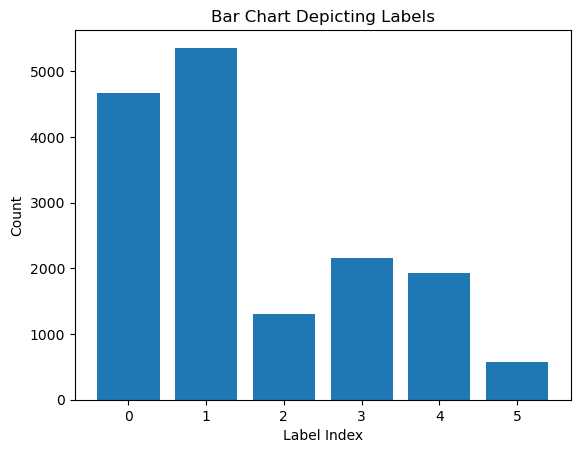

In [5]:
label_counts=df['label'].value_counts()

#Plotting a graph about the labels
import matplotlib.pyplot as plt

plt.bar(label_counts.index, label_counts.values)
plt.title('Bar Chart Depicting Labels')
plt.ylabel('Count')
plt.xlabel('Label Index')
plt.show()

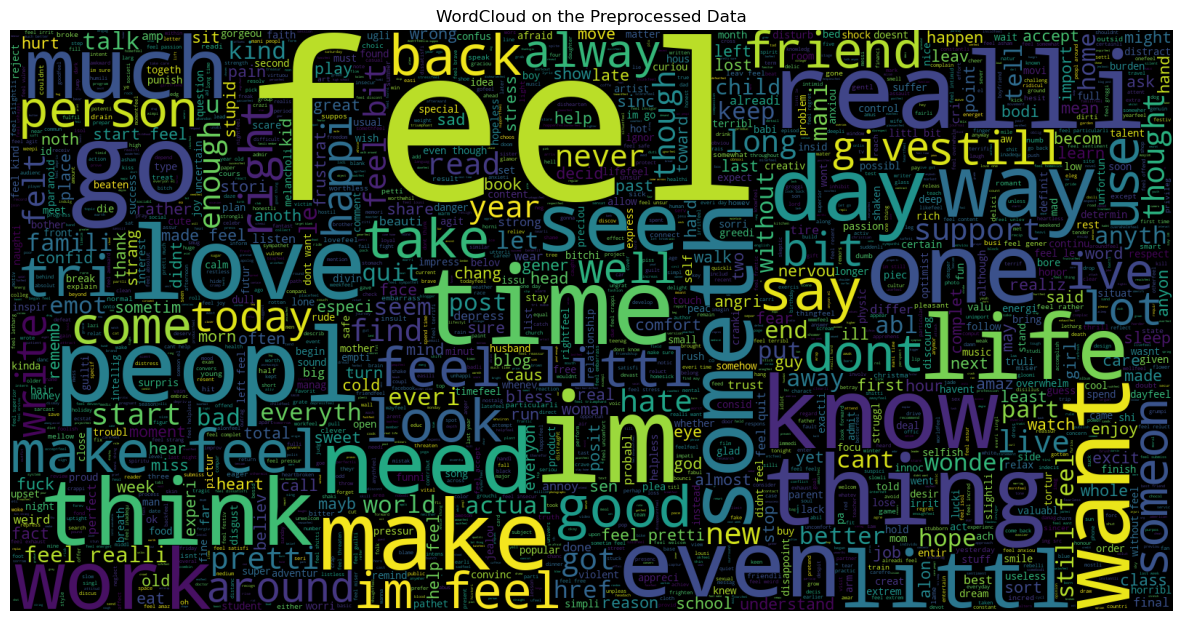

In [6]:
#Generating the Word Cloud
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="black", max_words=2000, max_font_size=300, width=1600, height=800)
wordcloud.generate(''.join(df['text'].str.lower()))

plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordCloud on the Preprocessed Data')
plt.show()

**Separating Independent & Dependent Features**

In [7]:
x = df['text'].values
y = df['label'].values

**TFIDF Vectorization**

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(x)
x = tfidf_vectorizer.transform(x)

**Train and Split Data for Model Training**

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2, shuffle=True)

**XGBoost Model Training and Results Evaluation**

In [10]:
#Training and Testing with XGBoost Model
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators=80)
xgb.fit(x_train,y_train)
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

In [11]:
#Obtaining metrics data like accuracy, recall, f1 score, precision
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
training_data_accuracy_xgb = accuracy_score(y_pred_train,y_train)
print("Accuracy on Training Data: ", training_data_accuracy_xgb)
test_data_accuracy_xgb = accuracy_score(y_pred_test,y_test)
print("Accuracy on Test Data: ", test_data_accuracy_xgb)

training_data_f1score_xgb = f1_score(y_pred_train,y_train, average='macro')
print("F1 Score on Training Data: ", training_data_f1score_xgb)
test_data_f1score_xgb = f1_score(y_pred_test,y_test, average='macro')
print("F1 Score on Test Data: ", test_data_f1score_xgb)

training_data_precision_xgb = precision_score(y_pred_train,y_train, average='macro')
print("Precision on Training Data: ", training_data_precision_xgb)
test_data_precision_xgb = precision_score(y_pred_test,y_test, average='macro')
print("Precision on Test Data: ", test_data_precision_xgb)

training_data_recall_xgb = recall_score(y_pred_train,y_train, average='macro')
print("Recall on Training Data: ", training_data_recall_xgb)
test_data_recall_xgb = recall_score(y_pred_test,y_test, average='macro')
print("Recall on Test Data: ", test_data_recall_xgb)

Accuracy on Training Data:  0.937578125
Accuracy on Test Data:  0.8475
F1 Score on Training Data:  0.9311876030169427
F1 Score on Test Data:  0.8142062345605873
Precision on Training Data:  0.9313291752207314
Precision on Test Data:  0.8134008162832619
Recall on Training Data:  0.9318836294146803
Recall on Test Data:  0.8162585234973648


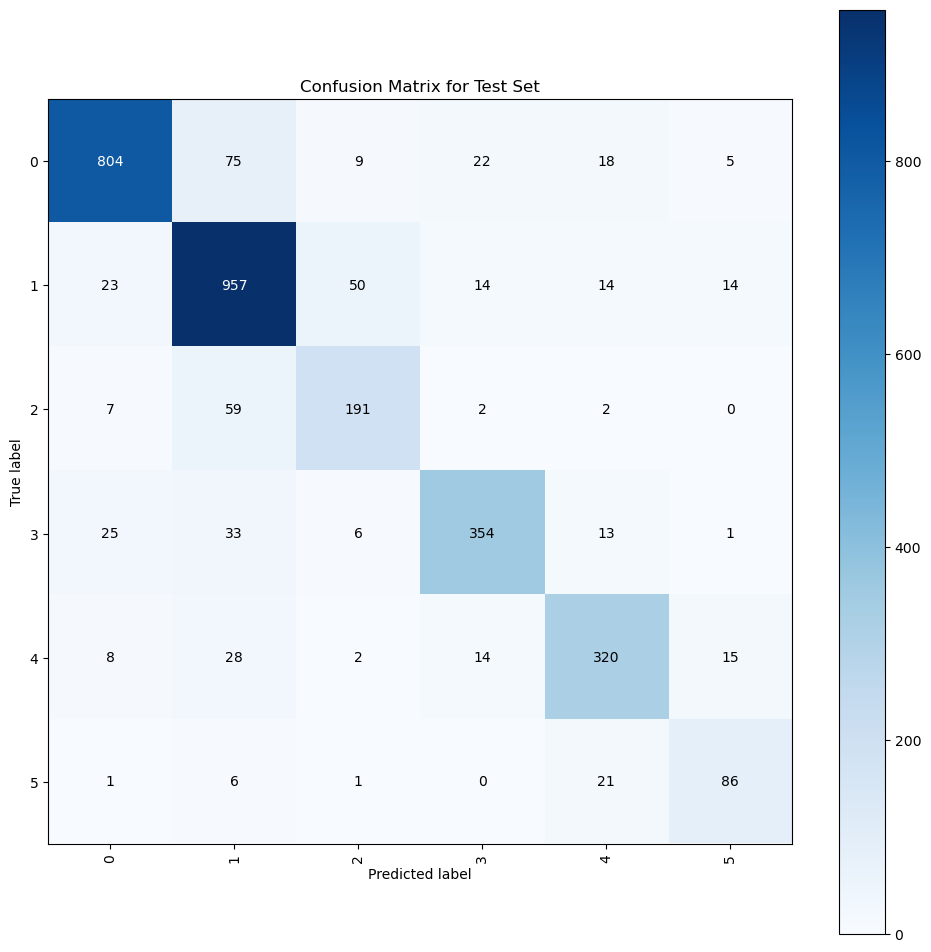

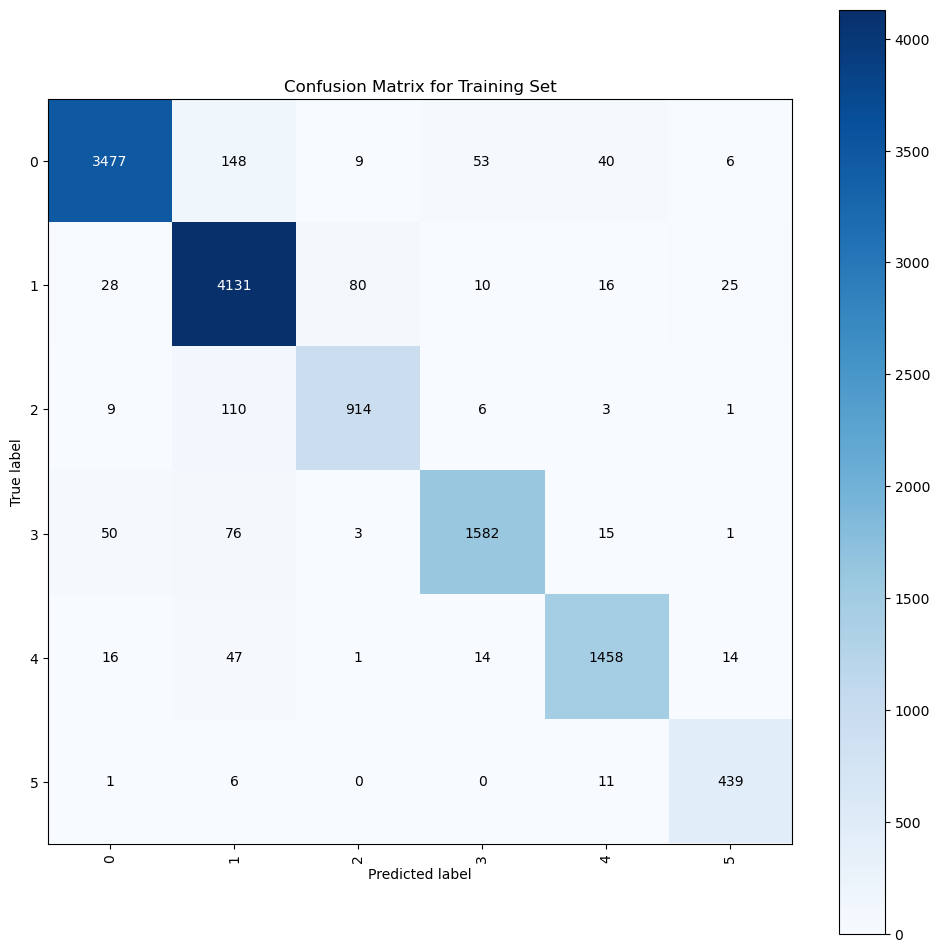

In [12]:
#Building Confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred_test,
    figsize = (12,12), x_tick_rotation = 90)
plt.title('Confusion Matrix for Test Set')
plt.show()

skplt.metrics.plot_confusion_matrix(
    y_train,
    y_pred_train,
    figsize = (12,12), x_tick_rotation = 90)
plt.title('Confusion Matrix for Training Set')
plt.show()

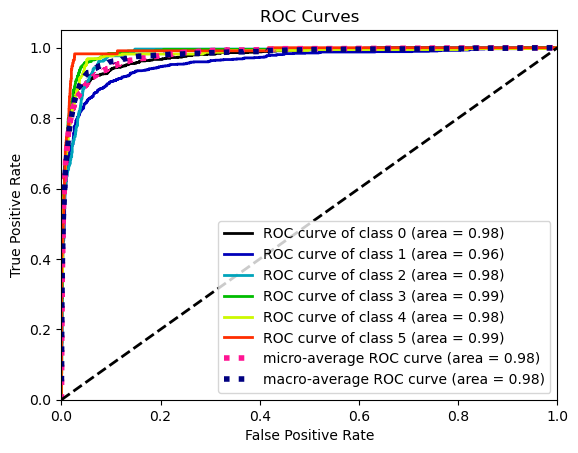

In [13]:
#Building ROC Curve for XGBoost Model
y_probas = xgb.predict_proba(x_test)
skplt.metrics.plot_roc(
    y_test,
    y_probas)
plt.show()